In [12]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns

In [16]:
ds = xr.open_mfdataset("/home/satyam/Documents/Thesis_Work/Data1/precip.mon.mean.nc")
# If required as pandas dataframe
df = ds.to_dataframe().reset_index()
df = df[(df["time"] >= pd.to_datetime("1993-01-01")) & (df["time"] < pd.to_datetime("2002-12-31"))]
df = df[(df["lon"] > 30) & (df["lon"] < 120) & (df["lat"] > 0) & (df["lat"] < 45)]
df

,lat,lon,nv,time,time_bnds,lat_bnds,lon_bnds,precip
5175384,1.25,31.25,0,1993-01-01,1993-01-01,0.0,30.0,1.921471
5175385,1.25,31.25,0,1993-02-01,1993-02-01,0.0,30.0,2.759369
5175386,1.25,31.25,0,1993-03-01,1993-03-01,0.0,30.0,3.329423
5175387,1.25,31.25,0,1993-04-01,1993-04-01,0.0,30.0,5.320088
5175388,1.25,31.25,0,1993-05-01,1993-05-01,0.0,30.0,6.852609
...,...,...,...,...,...,...,...,...
7649065,43.75,118.75,1,2002-08-01,2002-09-01,45.0,120.0,1.675602
7649066,43.75,118.75,1,2002-09-01,2002-10-01,45.0,120.0,0.333059
7649067,43.75,118.75,1,2002-10-01,2002-11-01,45.0,120.0,0.739434
7649068,43.75,118.75,1,2002-11-01,2002-12-01,45.0,120.0,0.067391


In [17]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

In [18]:
# Selecting 10 years data from 1993 - 2002

area = ds.sel(time = slice("1993-01-01" , "2002-12-31"))
area

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 120)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2002-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (lat, nv) float32 dask.array<chunksize=(72, 2), meta=np.ndarray>
    lon_bnds   (lon, nv) float32 dask.array<chunksize=(144, 2), meta=np.ndarray>
    precip     (time, lat, lon) float32 dask.array<chunksize=(120, 72, 144), meta=np.ndarray>
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         http://www.esrl.noaa.gov/psd/data/gridded/data.gpc...
    version:               V2.3
    Acknowledgement:       \n
    contributor_name:      Robert Adler    University of Maryland \nGeorge Hu...
    dataset_title:         Global Precipitation Climatology Project (GPCP) Mo...
    description:           https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/05 through latest.

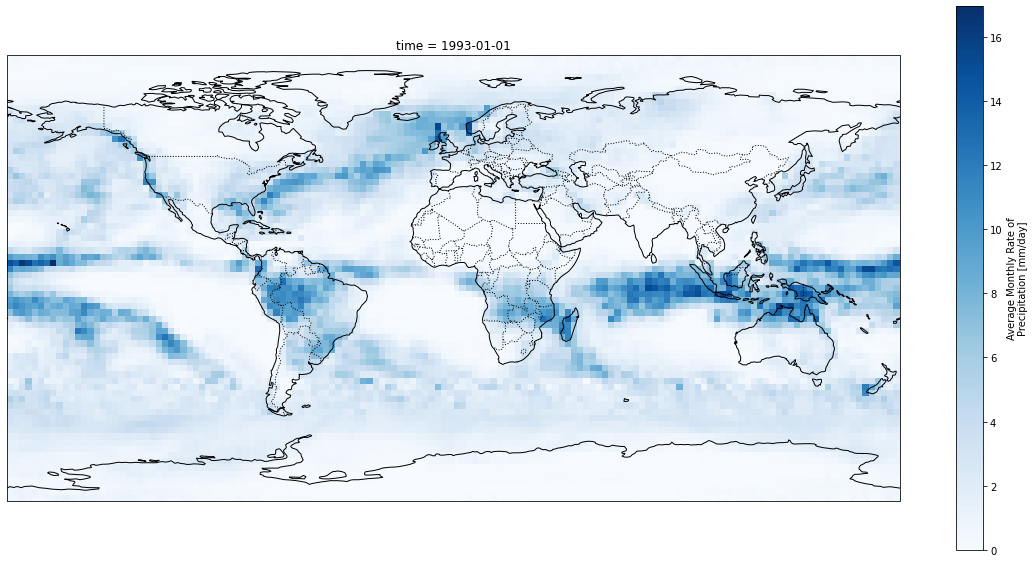

In [19]:
_, ax = make_figure()
grid = area.isel(time=0).precip
grid.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = "Blues")

In [20]:
fig, ax = make_figure()

frames = area.time.size                      # Number of frames
min_value = float(area.precip.min().values)  # Lowest value
max_value = float(area.precip.max().values)  # Highest value

def draw(frame, add_colorbar):
    grid = area.isel(time=frame).precip
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value , cmap = "Blues")
    title = "Time - " + str(grid.time.values)
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
plt.close(fig)

In [21]:
 ani.save('precip.mp4', writer=animation.FFMpegWriter(fps=5))